In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'index2018.csv')
data_copy = data.copy()
data_copy.date = pd.to_datetime(data_copy.date,dayfirst = True)
data_copy.set_index('date',inplace = True)
data_copy = data_copy.asfreq('b')
data_copy = data_copy.fillna(method = 'ffill')

In [3]:
data_copy['market_value'] = data_copy.ftse

In [4]:
data_copy.drop(['spx','dax','ftse','nikkei'],axis = 1,inplace = True)
train_size = int(len(data_copy)*0.8)
train_data,test_data = data_copy.iloc[:train_size],data_copy.iloc[train_size:]

## ACF

In [5]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

Text(0, 0.5, 'Correlation value')

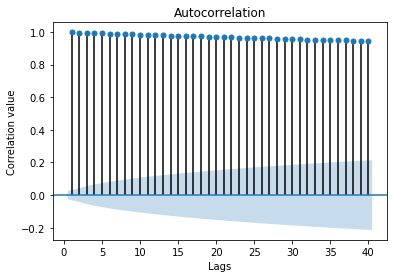

In [9]:
sgt.plot_acf(data_copy.market_value,lags = 40,zero = False)
plt.xlabel('Lags')
plt.ylabel('Correlation value')

## PACF

Text(0, 0.5, 'Correlation value')

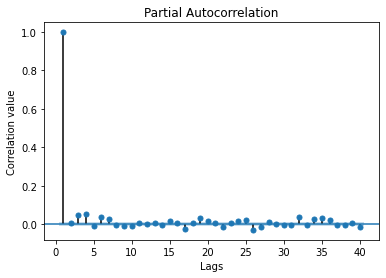

In [11]:
sgt.plot_pacf(data_copy.market_value,lags = 40,alpha = 0.45,zero = False, method = ('ols'))
plt.xlabel('Lags')
plt.ylabel('Correlation value')

## Fitting the ARMA model for AR

In [12]:
from statsmodels.tsa.arima_model import ARMA

In [13]:
## Using lag value 
arma_model = ARMA(data_copy.market_value,order = (1,0))   ## 1 is the lag, 0 means no residuals are considered

In [14]:
results = arma_model.fit()

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(1, 0)   Log Likelihood              -34438.047
Method:                       css-mle   S.D. of innovations             58.378
Date:                Thu, 30 Jul 2020   AIC                          68882.094
Time:                        10:49:42   BIC                          68902.328
Sample:                    01-07-1994   HQIC                         68889.105
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5720.0011    761.613      7.510      0.000    4227.267    7212.735
ar.L1.market_value     0.9991      0.001   1607.382      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

standard error - how far the values are from the original one.
z value - significance test statistic
p value - 0.005
last columns are critical values for 95% confidence interval

In [27]:
### model for 2 lags
arma_model_lag_2 = ARMA(data_copy.market_value,order = (2,0))

In [28]:
results_lag_2 = arma_model_lag_2.fit()

In [29]:
results_lag_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -34437.741
Method:                       css-mle   S.D. of innovations             58.376
Date:                Thu, 30 Jul 2020   AIC                          68883.483
Time:                        11:00:12   BIC                          68910.462
Sample:                    01-07-1994   HQIC                         68892.830
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6808    667.107      8.130      0.000    4116.175    6731.187
ar.L1.market_value     0.9905      0.013     78.749      0.000       0.966       1.015
ar.L2.market_value     0.0086      0.013      0.683      0.495      -0.016       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2         -116.3009           +0.0000j          116.3009            0.5000
-----------------------------------------------------------------------------
"""

### Using log likelihood ratio for determining the model 

In [30]:
from scipy.stats.distributions import chi2

def log_likelihood_ratio(model_1,model_2,df = 1):
    log_likelihood_model_1 = model_1.fit().llf
    log_likelihood_model_2 = model_2.fit().llf
    likelihood_ratio = (2*(log_likelihood_model_2-log_likelihood_model_1))
    p_value = chi2.sf(likelihood_ratio,df).round(3)
    return p_value

In [31]:
log_likelihood_ratio(arma_model,arma_model_lag_2)

0.434